## Project on Best Mobiles under 25000

#### The project is workes with the help of Web Scrapping technique.From the website www.91mobiles.com  The data's of best mobile phones comes under the range of 25000 as been shortlised.The Basic EDA process for the fetched datas had been done.

#### Importing the libraries required for the EDA and Scrapping process

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

#### Making request to get the required web address/URL to fetch the data 

In [2]:
URL = 'https://www.91mobiles.com/top-10-mobiles-below-25000-in-india'
response = requests.get(URL)

#### Checking the content of whole page

In [3]:
response.content

b'    <!DOCTYPE html>\n    <html>\n    <head>\n                            <script type="text/javascript">\n                (function () {\n                    var s = document.createElement(\'script\');\n                    s.type = \'text/javascript\';\n                    s.async = true;\n                    s.src = \'//ht-91mobiles.hoverr.media/js/tera_91mobiles.js\';\n                    var x = document.getElementsByTagName(\'script\')[0];\n                    x.parentNode.insertBefore(s, x);\n                })();\n            </script>\n                        <script type="text/javascript">\n            var menu_cat_id = 553;\n            var floating_menu = true;\n        </script>\n        <meta http-equiv="content-type" content="text/html;">\n<title>Best Mobile phones under Rs. 25,000 in India (15th April 2021) | 91mobiles.com</title>\n<META NAME="description" CONTENT="Looking for best mobile phones under Rs. 25,000 in India but confused? Get the list of top 10 phones onlin

#### Basic cleaning process of data

In [4]:
soup = BeautifulSoup(response.content,'html.parser')

#### Fetching the required value from the page

In [5]:
df = soup.find_all('div', class_= 'finder_snipet_wrap')


#### Checking the type and length of the fetched data

In [6]:
print(type(df))


<class 'bs4.element.ResultSet'>


In [7]:
len(df)

10

### Fetching needed data from the whole page

In [8]:
df_pdt1 = df[0]
df_pdt1

<div class="finder_snipet_wrap" data-row="1">
<div class="filter filer_finder">
<div class="filter-left filter_left">
<span class="various_favorite fvrt_icon favorite_35593 gaclick" data-action="add" data-activityid="" data-category-id="553" data-href="" data-pro-name="Xiaomi Mi 10i 8GB RAM price in India" data-product-id="35593" data-type="favourite" rel="nofollow" title="Add to favourites"></span>
<span class="finder-image-box target_link_new_tab" data-href-url="xiaomi-mi-10i-8gb-ram-price-in-india?utm_source=91m&amp;utm_medium=top10&amp;utm_campaign=midprod" target="_blank">
<img alt="Xiaomi Mi 10i 8GB RAM price in India" class="finder_pro_image fimage gaclick" data-type="image" src="//www.91-img.com/pictures/142055-v2-xiaomi-mi-10i-8gb-ram-mobile-phone-medium-1.jpg?tr=q-60" title="Xiaomi Mi 10i 8GB RAM"/>
</span>
<div class="compare1 padL10"><span cat="mobile" class="compare-button gaclick" data-comp-add-text="Compare" data-comp-added-text="Compare" data-image="//www.91-img.com/pic

In [9]:
df_pdt1.div

<div class="filter filer_finder">
<div class="filter-left filter_left">
<span class="various_favorite fvrt_icon favorite_35593 gaclick" data-action="add" data-activityid="" data-category-id="553" data-href="" data-pro-name="Xiaomi Mi 10i 8GB RAM price in India" data-product-id="35593" data-type="favourite" rel="nofollow" title="Add to favourites"></span>
<span class="finder-image-box target_link_new_tab" data-href-url="xiaomi-mi-10i-8gb-ram-price-in-india?utm_source=91m&amp;utm_medium=top10&amp;utm_campaign=midprod" target="_blank">
<img alt="Xiaomi Mi 10i 8GB RAM price in India" class="finder_pro_image fimage gaclick" data-type="image" src="//www.91-img.com/pictures/142055-v2-xiaomi-mi-10i-8gb-ram-mobile-phone-medium-1.jpg?tr=q-60" title="Xiaomi Mi 10i 8GB RAM"/>
</span>
<div class="compare1 padL10"><span cat="mobile" class="compare-button gaclick" data-comp-add-text="Compare" data-comp-added-text="Compare" data-image="//www.91-img.com/pictures/142055-v2-xiaomi-mi-10i-8gb-ram-mobile-p

In [10]:
df_pdt1.a

<a class="hover_blue_link name gaclick" data-type="name" href="/xiaomi-mi-10i-8gb-ram-price-in-india?utm_source=91m&amp;utm_medium=top10&amp;utm_campaign=midprod" target="_blank" title="Xiaomi Mi 10i 8GB RAM">Xiaomi Mi 10i 8GB RAM</a>

In [11]:
df_pdt1.h3

<h3><a class="hover_blue_link name gaclick" data-type="name" href="/xiaomi-mi-10i-8gb-ram-price-in-india?utm_source=91m&amp;utm_medium=top10&amp;utm_campaign=midprod" target="_blank" title="Xiaomi Mi 10i 8GB RAM">Xiaomi Mi 10i 8GB RAM</a></h3>

#### Name of product

In [12]:
df_pdt1 = df_pdt1.h3.a.text
df_pdt1

'Xiaomi Mi 10i 8GB RAM'

#### Percentage rating of product

In [13]:
df_rating = soup.find('div',class_='rating_box_new_list')
df_rating.get_text().strip()

'84%'

#### Ram of Product

In [14]:
df_ram = soup.find('div',class_='a filter-list-text').contents[4]
df_ram.text

'8 GB RAM'

#### Android version of product

In [15]:
df_vers1 = soup.find('div', class_='os_icon_cat')
df_vers1.get_text().strip()

'Android v10 (Q)'

#### Price of product

In [16]:
df_pric1 = soup.find('span',class_='price price_padding').contents[1]
df_pric1

'23,999'

#### Fetching data of whole products

In [23]:
names = []
android_version = []
price = []
ram_memory = []
rating = []
for details in df:
    ###if details.find()
    name = details.h3.a.text
    names.append(name)
    
    version = details.find('div', class_='os_icon_cat').get_text().strip()
    android_version.append(version)
    
    ram = details.find('div',class_='a filter-list-text').contents[4].get_text().strip()
    ram_memory.append(ram)
    
    rate = details.find('div',class_='rating_box_new_list').get_text().strip()
    rating.append(rate)
    
    prices = details.find('span',class_='price price_padding').contents[1]
    price.append(prices)

### Making dataframe with the fetched data

In [24]:
test_df = pd.DataFrame({
    'Mobile_name' :names,
    'Version' :android_version,
    'RAM':ram_memory,
    'Rating':rating,
    'Price(Rs)':price
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Mobile_name  10 non-null     object
 1   Version      10 non-null     object
 2   RAM          10 non-null     object
 3   Rating       10 non-null     object
 4   Price(Rs)    10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes
None


,Mobile_name,Version,RAM,Rating,Price(Rs)
0,Xiaomi Mi 10i 8GB RAM,Android v10 (Q),8 GB RAM,84%,"23,999"
1,Samsung Galaxy M51,Android v10 (Q),6 GB RAM,87%,"22,999"
2,Realme Narzo 30 Pro,Android v10 (Q),6 GB RAM,85%,"17,835"
3,Moto G 5G,Android v10 (Q),6 GB RAM,85%,"21,990"
4,Realme 8 Pro 8GB RAM,Android v11,8 GB RAM,86%,"20,845"
5,Vivo V20,Android v11,8 GB RAM,86%,"21,398"
6,Samsung Galaxy M31s 8GB RAM,Android v10 (Q),8 GB RAM,84%,"20,499"
7,Realme 7 Pro,Android v10 (Q),6 GB RAM,85%,"18,399"
8,Xiaomi Poco X2 128GB,Android v10 (Q),6 GB RAM,84%,"20,925"
9,Realme 6 Pro 128GB,Android v10 (Q),6 GB RAM,84%,"18,799"


#### Basic EDA

In [27]:
test_df.describe()

,Mobile_name,Version,RAM,Rating,Price(Rs)
count,10,10,10,10,10
unique,10,2,2,4,10
top,Samsung Galaxy M51,Android v10 (Q),6 GB RAM,84%,"20,925"
freq,1,8,6,4,1


In [28]:
test_df.isnull().sum()

Mobile_name    0
Version        0
RAM            0
Rating         0
Price(Rs)      0
dtype: int64

In [29]:
test_df.shape

(10, 5)

In [35]:
test_df.columns

Index(['Mobile_name', 'Version', 'RAM', 'Rating', 'Price(Rs)'], dtype='object')

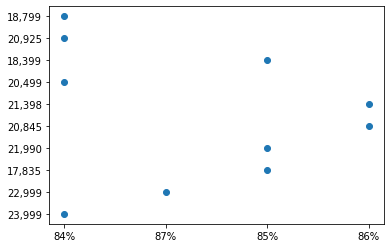

In [38]:
plt.scatter(test_df['Rating'],test_df['Price(Rs)'])

Text(0.5, 1.0, '% Rating of 10 mobile phones under 25000 ')

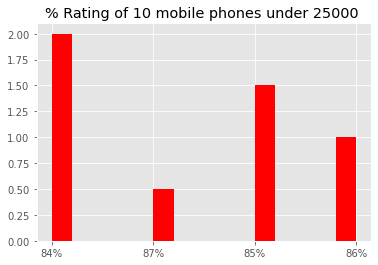

In [63]:
colors = ['red']
labels = ['% rating']
plt.style.use('ggplot')
plt.hist(test_df['Rating'],density = True ,color = colors,label= labels,bins= 15)
plt.title('% Rating of 10 mobile phones under 25000 ')

Text(0.5, 1.0, 'RAM spec for top mobiles under 25000')

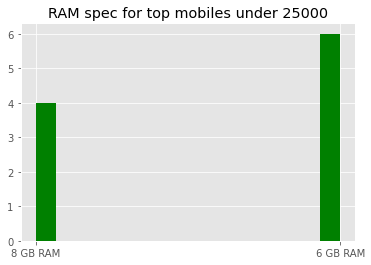

In [65]:
plt.hist(test_df['RAM'],bins=15,color = 'green')
plt.title('RAM spec for top mobiles under 25000')

ValueError: could not convert string to float: '23,999'

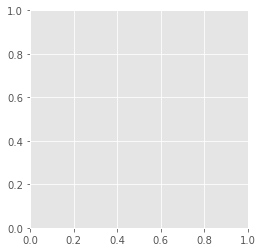

In [68]:
plt.pie(test_df['Price(Rs)'])